# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import passengers.csv and set it as a time-series object. Plot the TS
df = pd.read_csv('passengers.csv')
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [3]:
df['Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null datetime64[ns]
#Passengers    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


In [4]:
df = df.set_index('Month')
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

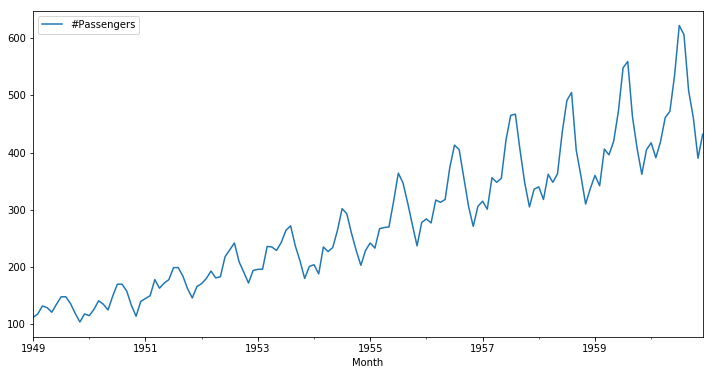

In [5]:
df.plot(figsize=(12,6))
plt.show()

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [6]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
def stationarity_check(ts):
    
    from statsmodels.tsa.stattools import adfuller
    
    #rolling statistics
    rolmean = ts.rolling(window=8, center=False).mean()
    rolstd = ts.rolling(window=8, center=False).std()
    
    #Dickey Fuller Test
    dftest = adfuller(ts['#Passengers'])
    print('Dickey Fuller Test Results:')
    dfresult = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value',
                                            '#Lags Used', 'Number of Obs Used'])
    for k, v in dftest[4].items():
        dfresult['Critical Value {}'.format(k)] = v
    print(dfresult)
    
    plt.figure(figsize=(12,6))
    plt.plot(ts, label='Original')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Std')
    plt.show()
    
    return None

Use your newly created function on the airpassenger data set.

Dickey Fuller Test Results:
Test Statistics         0.815369
p-value                 0.991880
#Lags Used             13.000000
Number of Obs Used    130.000000
Critical Value 1%      -3.481682
Critical Value 5%      -2.884042
Critical Value 10%     -2.578770
dtype: float64


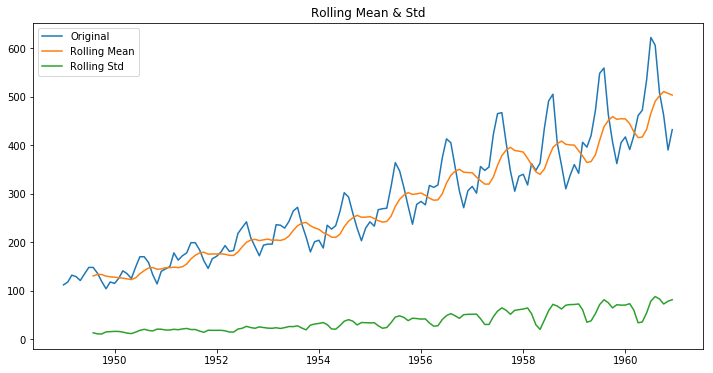

In [7]:
# Code here
stationarity_check(df)

## Perform a log() and sqrt() transform

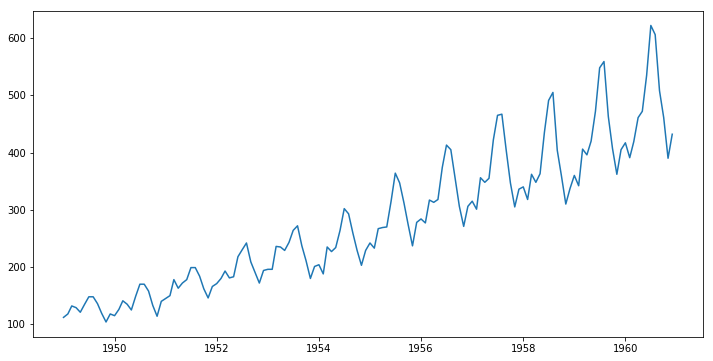

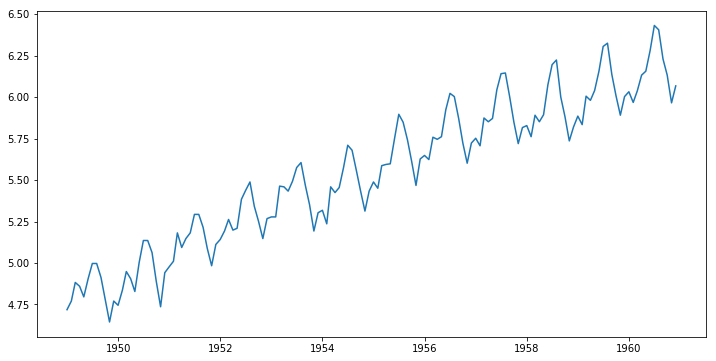

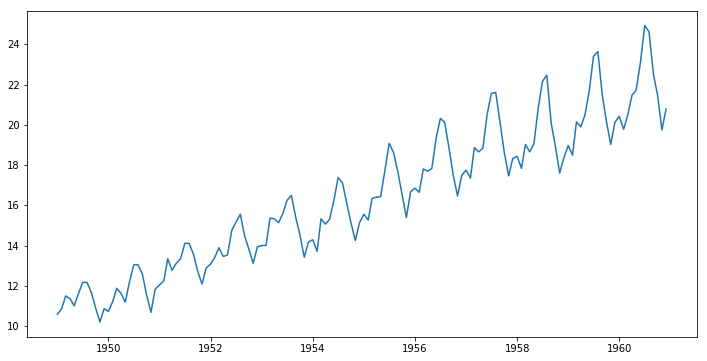

In [8]:
# Log transform timeseries and compare with original to check the effect
df_log = np.log(df)
df_sqrt = np.sqrt(df)

for data in [df, df_log, df_sqrt]:
    plt.figure(figsize=(12,6))
    plt.plot(data)
    plt.show()

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

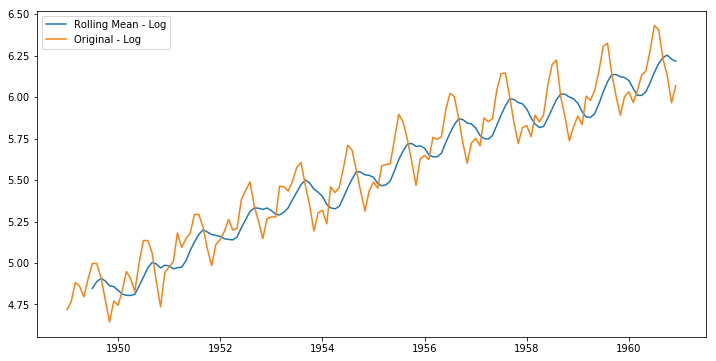

In [9]:
# your code here
rolmean_log = np.log(df).rolling(window=7, center=False).mean()

plt.figure(figsize=(12,6))
plt.plot(rolmean_log, label='Rolling Mean - Log')
plt.plot(df_log, label='Original - Log')
plt.legend()
plt.show()

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [10]:
# Subtract the moving average from the original data and check head for Nans
df_log_minus_rolmean = df_log - rolmean_log
df_log_minus_rolmean.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,0.150059
1949-08-01,0.110242
1949-09-01,0.005404


In [11]:
# Drop the NaN values from timeseries calculated above
df_log_minus_rolmean.dropna(inplace=True)

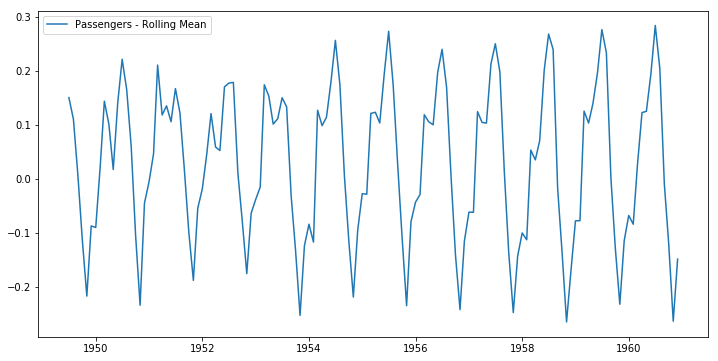

In [12]:
# Plot the result
plt.figure(figsize=(12,6))
plt.plot(df_log_minus_rolmean, label='Passengers - Rolling Mean')
plt.legend()
plt.show()

Finally, use your function `check_stationarity` to see if this series is considered stationary!

Dickey Fuller Test Results:
Test Statistics        -2.348027
p-value                 0.156946
#Lags Used             14.000000
Number of Obs Used    123.000000
Critical Value 1%      -3.484667
Critical Value 5%      -2.885340
Critical Value 10%     -2.579463
dtype: float64


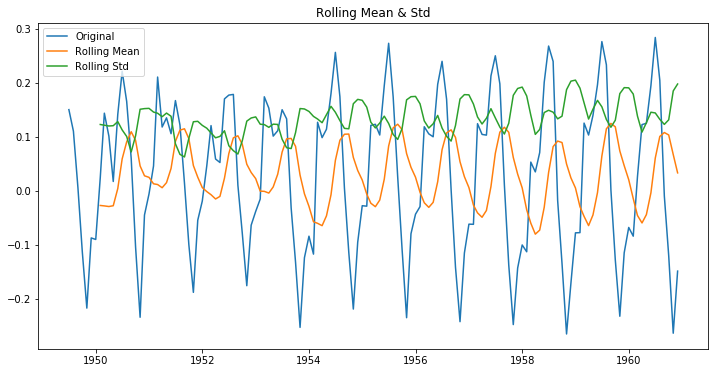

In [13]:
# Your code here
stationarity_check(df_log_minus_rolmean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [14]:
# Your conclusion here

# The time series are not stationary, as the p-value is still substantial 
# (0.15 instead of smaller than the typical threshold value 0.05).

## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

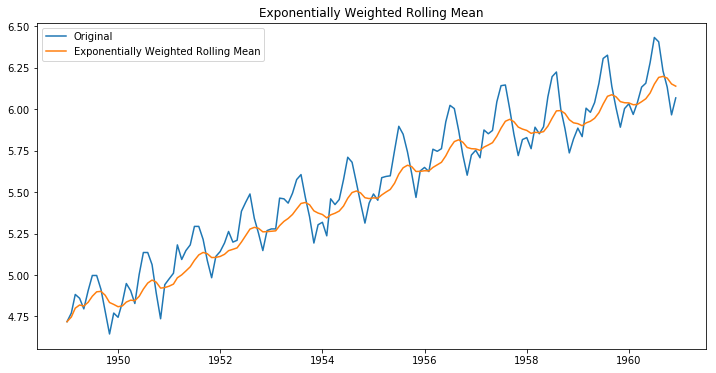

In [15]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
exp_rolmean = df_log.ewm(halflife=4).mean()

# Plot the original data with exp weighted average
plt.figure(figsize=(12,6))
plt.plot(df_log, label='Original')
plt.plot(exp_rolmean, label='Exponentially Weighted Rolling Mean')
plt.legend()
plt.title('Exponentially Weighted Rolling Mean')
plt.show()

In [16]:
# Subtract the moving average from the original data and plot
df_log_minus_exp_rolmean = df_log - exp_rolmean
df_log_minus_exp_rolmean.head(10)

,#Passengers
Month,
1949-01-01,0.000000
1949-02-01,0.023838
1949-03-01,0.082598
1949-04-01,0.040640
1949-05-01,-0.016963
1949-06-01,0.069750
1949-07-01,0.125079
1949-08-01,0.098545
1949-09-01,0.011170


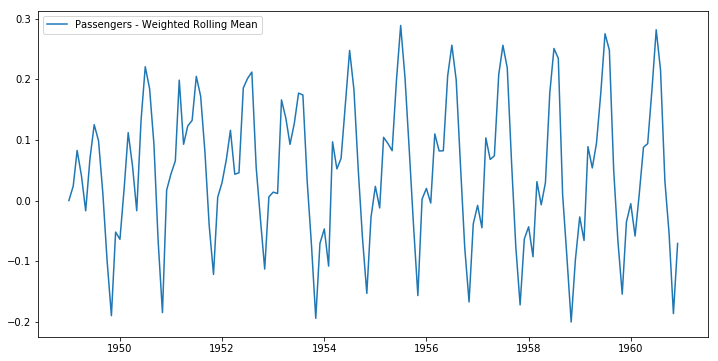

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df_log_minus_exp_rolmean, label='Passengers - Weighted Rolling Mean')
plt.legend()
plt.show()

Dickey Fuller Test Results:
Test Statistics        -3.297250
p-value                 0.015002
#Lags Used             13.000000
Number of Obs Used    130.000000
Critical Value 1%      -3.481682
Critical Value 5%      -2.884042
Critical Value 10%     -2.578770
dtype: float64


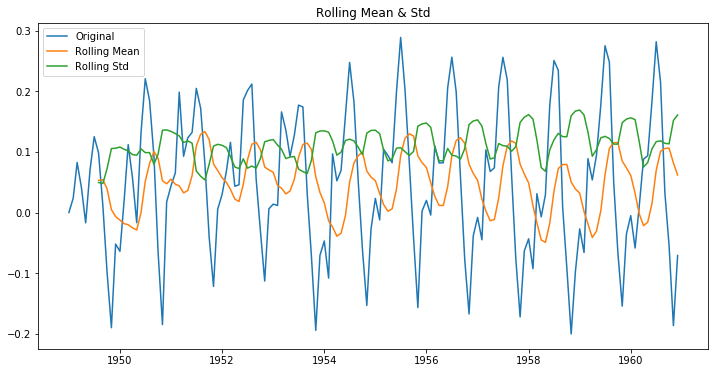

In [18]:
# do a stationarity check
stationarity_check(df_log_minus_exp_rolmean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [19]:
# Your conclusion here

# The p-value of the Dickey-Fuller test <0.05, so this series seems to be stationary according to this test! 
# Do note that there is still strong seasonality.


## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [20]:
# difference your data and look at the head
df_diff = df_log_minus_exp_rolmean.diff(periods=12)
df_diff.head(15)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


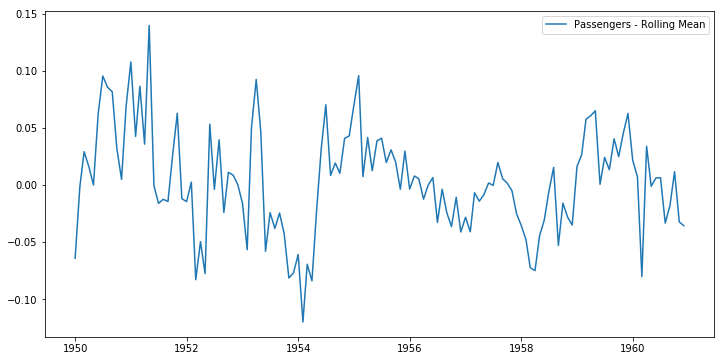

In [21]:
# plot your differenced time series
plt.figure(figsize=(12,6))
plt.plot(df_diff, label='Passengers - Rolling Mean')
plt.legend()
plt.show()

In [22]:
# drop nas
df_diff.dropna(inplace=True)

Dickey Fuller Test Results:
Test Statistics        -3.601666
p-value                 0.005729
#Lags Used             12.000000
Number of Obs Used    119.000000
Critical Value 1%      -3.486535
Critical Value 5%      -2.886151
Critical Value 10%     -2.579896
dtype: float64


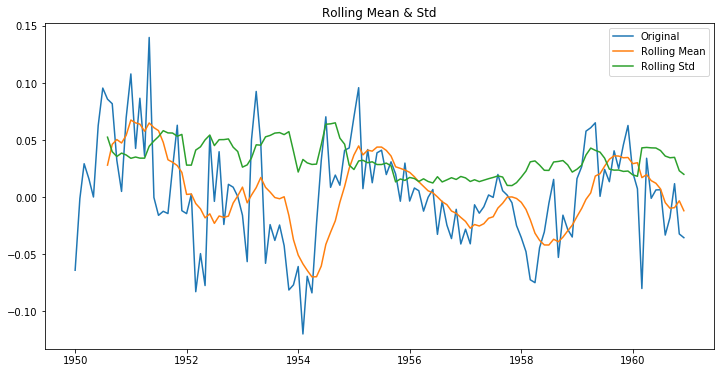

In [23]:
# perform the stationarity check
stationarity_check(df_diff)

### Your conclusion

In [24]:
# Your conclusion here

# Even though the rolling mean and rolling average lines do seem to be fluctuating, the movements seem to be completely random, 
# and the same conclusion holds for the original time series. 
# The time series is now ready for modeling!


## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.